In [1]:
from PIL import Image as im
import numpy as np

In [ ]:
Im1=im.open('Original.jpg')
original=Im1.convert('L')
Im2=im.open('Graffiti.jpg')
graffiti=Im2.convert('L')
Im3=im.open('Mask.jpg')
mask=Im3.convert('L')
og=np.array(original)
gr=np.array(graffiti)
mk=np.array(mask)
graffiti

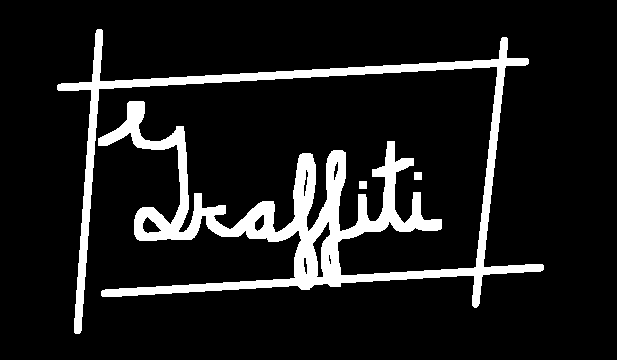

In [3]:
#prepare mask for site classification
n=mk.shape[0]
m=mk.shape[1]
inside=[]
boundary=[]
for i in range(1,n-1):
    for j in range(1,m-1):
        if mk[i][j]>230:
            mk[i][j]=255
            inside.append([i,j])
        else:
            mk[i][j]=0
            if mk[i-1][j]>230 or mk[i+1][j]>230 or mk[i][j-1]>230 or mk[i][j+1]>230:
                boundary.append([i,j])
#Lattice points in the s notation are the index number in list inside
im.fromarray(mk)

In [4]:
#Initial conditions
u0=[]
stop=[]
suma=0
for k in inside:
    u0.append(float(gr[k[0]][k[1]]))
    stop.append(float(gr[k[0]][k[1]]))
    suma=suma+float(gr[k[0]][k[1]])
for k in boundary:
    u0.append(float(gr[k[0]][k[1]]))
lattice=inside+boundary
print (suma)
print (len(u0))
print (len(stop))
print (len(inside))
print (len(boundary))
print (len(lattice))

3744648.0
29806
24758
24758
5048
29806


In [5]:
#Let's solve with Jacobi
u=u0
count=0
b=5
while b>0.1:
    #control_u=u
    count=count+1
    for k in inside:
        u[inside.index(k)]=(1/4)*(u[lattice.index([k[0]+1,k[1]])]+u[lattice.index([k[0]-1,k[1]])]+
                u[lattice.index([k[0],k[1]+1])]+u[lattice.index([k[0],k[1]-1])])
        #stop[inside.index(k)]=abs(u[inside.index(k)]-control_u[inside.index(k)])
    #b=np.linalg.norm(stop)
    b=b+1

KeyboardInterrupt: 

In [ ]:
print (count)
print (b)

In [ ]:
rs=gr
for k in inside:
    rs[k[0]][k[1]]=u[inside.index(k)]
restored=im.fromarray(rs)
restored